### Practice with Scale Free Networks

A scale-free network is one whose degree distribution follows a power law. Recall that a power law is any function of the form $x^\alpha$. Let $p$ be the distribution of the degrees in a network. 

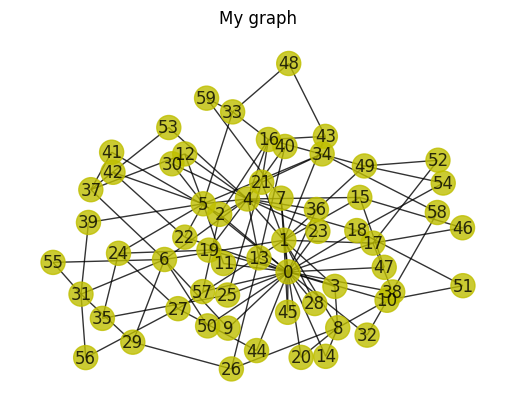

In [51]:
from network_utilities import show_graph
from network_utilities import show_degree_distribution
import networkx as nx

num_vertices: int = 60
num_new_edges: int = 2
G: nx.Graph = nx.barabasi_albert_graph(num_vertices, num_new_edges, seed=42)
show_graph(G)

Look at the degree distribution.

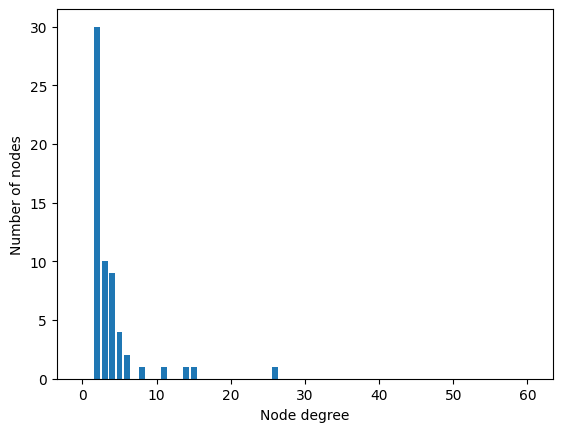

In [52]:
show_degree_distribution(G)

We can't do the _straight line test_ on this distribution because it isn't plotted on a log-log scale. We'll need a new plotting routine.

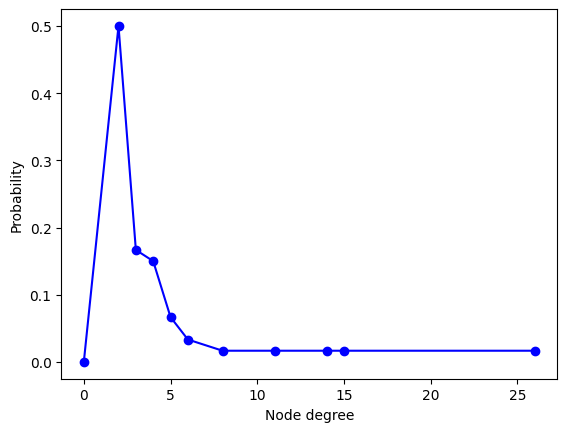

In [53]:
from network_utilities import get_degree_count_dictionary
import matplotlib.pyplot as plt
import numpy as np
from typing import Callable

def show_degree_density(G: nx.Graph, plotting_method: Callable = plt.plot) -> None:
    degree_pairs: dict[int,int] = sorted(get_degree_count_dictionary(G).items())
    x = [degree for degree, _ in degree_pairs]
    y = [count for _, count in degree_pairs]
    if 0 not in x:
        x.insert(0,0)
        y.insert(0,0)
    y = y / np.sum(y)
    #plt.loglog(x,y)
    plotting_method(x,y,'b-o')
    plt.xlabel('Node degree')
    plt.ylabel('Probability')

show_degree_density(G)


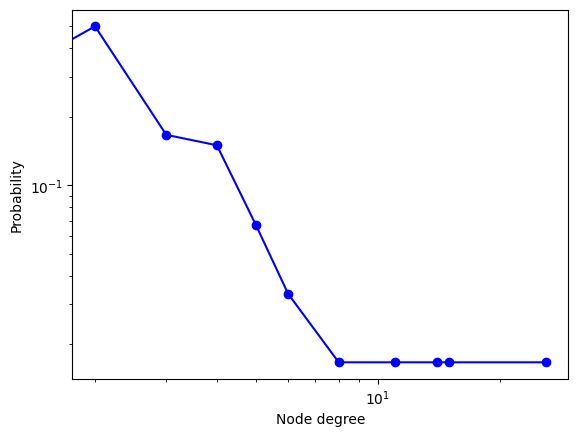

In [54]:
show_degree_density(G, plotting_method = plt.loglog)

---